In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [342]:
def plotResults(name, results):
    xs = results [:,0]
    ys = results [:, 1]
    plt.plot(xs, ys, s=0.7, label=name)

In [343]:
def runModel(name, d):
    print('Running the model...')
    model = TSNE(learning_rate = 150)
    transformedData = model.fit_transform(d)
    plotResults(name, transformedData)

Getting the relevant informations

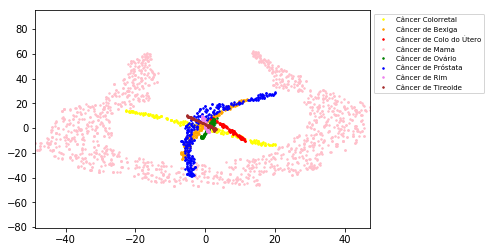

END


In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

features = ['tipo_cancer', 'sexo', 'grau_instrucao', 'renda_familiar', 'situacao_emprego', 
            'apresentou_sinal_sintoma', 'cancer_tem_metastase', 'nome_medicamento', 'qual_primeiro_tratamento', 'idade']
#            'ja_iniciou_tratamento', 'qual_tratamento', 'onde_faz_tratamento_atualmente', 'qual_primeiro_tratamento', 
#           'tratamento_alterou_sua_rotina', 
#            'nome_medicamento', 'apresentou_sinal_sintoma',

colors = {'Câncer Colorretal': 'yellow', 
          'Câncer de Bexiga': 'orange', 
          'Câncer de Mama': 'pink', 
          'Câncer de Próstata': 'blue', 
          'Câncer de Colo do Útero': 'red', 
          'Câncer de Rim': 'violet',
          'Câncer de Tireoide': 'brown',
          'Câncer de Ovário': 'green'}

#df2015 = pd.read_excel("oncoguia.xlsx", sheet_name = "protocolos_ate_31-08-2015")
df2017 = pd.read_excel("oncoguia.xlsx", sheet_name = "protocolos_2017")
#frames = [df2015, df2017]
#protocolos = pd.concat(frames)
protocolos = df2017
data = protocolos[features]
data = data[data['idade'] >= 0]
groupedData = data.groupby(data['tipo_cancer'])


fig, ax = plt.subplots()
ax.margins(0., 0.3)
for tipoCancer, dataByType in groupedData:
    del dataByType['tipo_cancer']
    dataByType = pd.get_dummies(dataByType)
    if(tipoCancer == 'Câncer Colorretal' or 
       tipoCancer ==  'Câncer de Bexiga' or 
       tipoCancer == 'Câncer de Mama' or 
       tipoCancer == 'Câncer de Próstata' or
       tipoCancer == 'Câncer de Colo do Útero' or
       tipoCancer == 'Câncer de Rim' or
       tipoCancer == 'Câncer de Tireoide' or
       tipoCancer == 'Câncer de Ovário'):
            model = TSNE(learning_rate = 100)
            transformedData = model.fit_transform(dataByType)
            xs = transformedData [:,0]
            ys = transformedData [:, 1]
            ax.plot(xs, ys, marker='o', linestyle='', ms=1.5, label=tipoCancer, c=colors[tipoCancer])
ax.legend(loc='upper left', prop={'size':7}, bbox_to_anchor=(1, 1))
plt.show()
fig.savefig('tsne.png')
print('END')